            Date     Time   Bus  Count OnOff   Latitude  Longitude   Route  \
0     11/13/2019  6:13:47  2403      1   off  35.306957 -80.729568    Gold   
1     11/13/2019  6:15:08  2401      1   off  35.308052 -80.732758   Green   
2     11/13/2019  6:15:14  2401      1    on  35.308052 -80.732758   Green   
3     11/13/2019  6:15:59  2407      1    on  35.308811 -80.725121  Silver   
4     11/13/2019  6:16:59  2407      1    on  35.307224 -80.725296  Silver   
...          ...      ...   ...    ...   ...        ...        ...     ...   
5690  11/14/2019  1:57:58  2411      1   off  35.311626 -80.742447  Silver   
5691  11/14/2019  1:58:47  2410      1   off  35.308788 -80.725128  Silver   
5692  11/14/2019  2:00:15  2410      2   off  35.307198 -80.725182  Silver   
5693  11/14/2019  2:01:20  2411      1    on  35.311081 -80.743011  Silver   
5694  11/14/2019  2:02:46  2411      1   off  35.309357 -80.743980  Silver   

                 Stop      CorrectStop  
0          Fretwell S 

<Figure size 288x288 with 0 Axes>

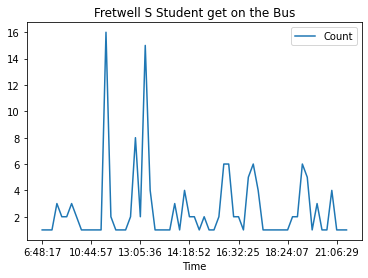

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plot

file = 'file1Dataframe.csv'
fileDataFrame = pd.read_csv(file, low_memory=False, index_col=0)

print(fileDataFrame)
print(fileDataFrame.dtypes)

dataforfretwell = fileDataFrame.loc[fileDataFrame['CorrectStop'] == 'Fretwell S']
dataforfretwell = dataforfretwell.reset_index()

print(dataforfretwell)

f = plot.figure()
f.set_figwidth(4)

dataforfretwell = dataforfretwell.query('OnOff =="on"')

dataforfretwell.plot(kind = 'line', x='Time',y ='Count')
plot.title('Fretwell S Student get on the Bus')
plot.show()

            Date     Time   Bus  Count OnOff   Latitude  Longitude   Route  \
0     11/13/2019  6:13:47  2403      1   off  35.306957 -80.729568    Gold   
1     11/13/2019  6:15:08  2401      1   off  35.308052 -80.732758   Green   
2     11/13/2019  6:15:14  2401      1    on  35.308052 -80.732758   Green   
3     11/13/2019  6:15:59  2407      1    on  35.308811 -80.725121  Silver   
4     11/13/2019  6:16:59  2407      1    on  35.307224 -80.725296  Silver   
...          ...      ...   ...    ...   ...        ...        ...     ...   
5690  11/14/2019  1:57:58  2411      1   off  35.311626 -80.742447  Silver   
5691  11/14/2019  1:58:47  2410      1   off  35.308788 -80.725128  Silver   
5692  11/14/2019  2:00:15  2410      2   off  35.307198 -80.725182  Silver   
5693  11/14/2019  2:01:20  2411      1    on  35.311081 -80.743011  Silver   
5694  11/14/2019  2:02:46  2411      1   off  35.309357 -80.743980  Silver   

                 Stop      CorrectStop  RunningTotal  
0       

C:\Users\HARRIS~1\AppData\Local\Temp/ipykernel_1404/4172880776.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafor2401.RunningTotal[i] = onBus


<Figure size 720x360 with 0 Axes>

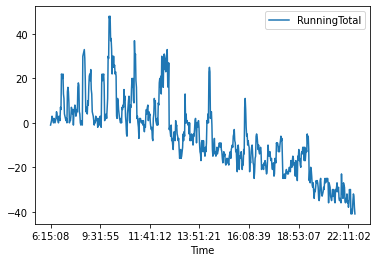

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from matplotlib.pyplot import figure

file = 'file1Dataframe.csv'

fileDataFrame = pd.read_csv(file, low_memory=False, index_col=0)
fileDataFrame["RunningTotal"] = np.nan
#fileDataframe = fileDataFrame.reindex(columns = fileDataFrame.columns.tolist() + ["RunningTotal"])
fileDataFrame['Time'] = fileDataFrame['Time'].astype(dtype = 'string')

print(fileDataFrame)

print(fileDataFrame.dtypes)

datafor2401 = fileDataFrame.loc[fileDataFrame['Bus'] == 2401]
datafor2401 = datafor2401.reset_index()

print(datafor2401)

onBus = 0


for i in range(0,len(datafor2401)):
    print (i,":",datafor2401.OnOff[i])
    if datafor2401.OnOff[i] == "on":
        onBus = onBus + datafor2401.Count[i]
    else:
        onBus = onBus - datafor2401.Count[i]
    datafor2401.RunningTotal[i] = onBus

print(datafor2401)

f = plot.figure()
f.set_figwidth(10)
f.set_figheight(5)

datafor2401.plot(kind='line', x='Time', y='RunningTotal')



plot.show()

In [8]:
import csv
import pandas as pd
import numpy as np

In [9]:
file1 = '2019-2020 Stop Data 11-13-2019.csv'
file2 = 'ddfile1.csv'

file1Dataframe = pd.read_csv(file1, low_memory=False)
ddfile1 = pd.read_csv(file2, low_memory=False)


file1Dataframe.dtypes

#file1Dataframe = file1Dataframe.round(4)
#file2Dataframe = file2Dataframe.round(4)

Date          object
Time          object
Bus            int64
Count          int64
On off        object
Latitude     float64
Longitude    float64
Route         object
Stop          object
dtype: object

In [5]:
lat = file1Dataframe.groupby("Stop", as_index = False)["Latitude"].mean()
long = file1Dataframe.groupby("Stop", as_index = False)["Longitude"].mean()
#ddfile1 = file1Dataframe.drop_duplicates('Stop')
#ddfile1 = pd.merge(lat, long, on="Stop", how="left")

file1Dataframe = file1Dataframe.round(5)
#ddfile1 = ddfile1.round(5)

#ddfile1.reset_index()

#ddfile1.to_csv("ddfile1.csv")


file1Dataframe = file1Dataframe.reindex(columns = file1Dataframe.columns.tolist() + ["CorrectStop"])
file1Dataframe.to_csv("file1Dataframe.csv")

#print(ddfile1)
#print(file1Dataframe)

In [10]:
file2 = 'ddfile1.csv'
ddfile1 = pd.read_csv(file2, low_memory=False)
ddfile1 = ddfile1.round(5)

file1Dataframe = file1Dataframe.reindex(columns = file1Dataframe.columns.tolist() + ["CorrectStop"])
file1Dataframe.to_csv("file1Dataframe.csv")


x = np.array([])
y = np.array([])
xy = np.array([])

for i in range(0, len(file1Dataframe)):
    print("i: ", i)
    for j in range(0, len(ddfile1)):
        #print(i, ',', j)
        a = [abs(file1Dataframe.Latitude[i] - ddfile1.Latitude[j])]
        b = [abs(file1Dataframe.Longitude[i] - ddfile1.Longitude[j])]
        a = np.array(a)
        b = np.array(b)
        x = np.append(x, a)
        y = np.append(y, b)
       

    xy = np.add(x, y)
    x = np.array([])
    y = np.array([])
    xy = np.round(xy,5)
    #print(xy)
    minElement = np.amin(xy)
    if(minElement > .01):
        print("                                       minElement ",i,":", minElement)
    result = np.argmin(xy)
    #print(xy)
    #print("index: ", result)

    #print(ddfile1)
    if (file1Dataframe.Stop[i] == "Student Union E") or (file1Dataframe.Stop[i] == "Student Union W"):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Student Union, No Change")
    elif(ddfile1.Stop[result] == "South Village Deck" and file1Dataframe.Route[i] == "Gold"):
        file1Dataframe.CorrectStop[i] = "Hunt Hall"
        print("Hunt Flip")
    elif(ddfile1.Stop[result] == "Hunt Hall" and file1Dataframe.Route[i] == "Green"):
        file1Dataframe.CorrectStop[i] = "South Village Deck"
        print("SOVI Deck Flip")
    elif((file1Dataframe.Stop[i] == "Cone Deck East") or (file1Dataframe.Stop[i] == "Cone Deck W")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Cone Deck, No Change")
        
    elif((file1Dataframe.Stop[i] == "South Village Deck") or (file1Dataframe.Stop[i] == "Hunt Hall")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Hunt/Deck, No Change")
    elif((file1Dataframe.Stop[i] == "Grigg Hall E") or (file1Dataframe.Stop[i] == "Grigg Hall W")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Grigg, No Change")
    elif((file1Dataframe.Stop[i] == "Cato Hall N") or (file1Dataframe.Stop[i] == "Cato Hall S")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Cato, No Change")
    elif((file1Dataframe.Stop[i] == "Robinson Hall S") or (file1Dataframe.Stop[i] == "Robinson Hall N")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Robinson, No Change")
    elif((file1Dataframe.Stop[i] == "Athletics Complex E") or (file1Dataframe.Stop[i] == "Athletics Complex W")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Athletics, No Change")
    elif((file1Dataframe.Stop[i] == "Hickory Hall South") or (file1Dataframe.Stop[i] == "Hickory Hall North")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Hickory, No Change")
    else:
        file1Dataframe.CorrectStop[i] = ddfile1.Stop[result]
print("Done Looping")


file1Dataframe.to_csv("file1Dataframe.csv")

i:  0
i:  1
Student Union, No Change
i:  2
Student Union, No Change
i:  3
i:  4
i:  5
Hunt/Deck, No Change
i:  6
i:  7
i:  8
Student Union, No Change
i:  9
i:  10
Cato, No Change
i:  11
i:  12
Student Union, No Change
i:  13
Student Union, No Change
i:  14
Cato, No Change
i:  15
Robinson, No Change
i:  16
Hunt/Deck, No Change
i:  17
Hunt/Deck, No Change
i:  18
i:  19
i:  20
Hunt/Deck, No Change
i:  21
i:  22
i:  23
Student Union, No Change
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
Cato, No Change
i:  31
Student Union, No Change
i:  32
i:  33
Hunt/Deck, No Change
i:  34
i:  35
i:  36
i:  37
i:  38
Cato, No Change
i:  39
i:  40
i:  41
i:  42
Hunt/Deck, No Change
i:  43
Student Union, No Change
i:  44
i:  45
Student Union, No Change
i:  46
i:  47
Student Union, No Change
i:  48
i:  49
i:  50
Hunt/Deck, No Change
i:  51
i:  52
i:  53
i:  54
i:  55
i:  56
i:  57
i:  58
Hunt/Deck, No Change
i:  59
i:  60
Student Union, No Change
i:  61
i:  62
i:  63
i:  64
i:  65
Student Union, No Cha

C:\Users\HARRIS~1\AppData\Local\Temp/ipykernel_1404/1044594862.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file1Dataframe.CorrectStop[i] = ddfile1.Stop[result]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


 147
Hunt/Deck, No Change
i:  148
i:  149
i:  150
Hunt/Deck, No Change
i:  151
Student Union, No Change
i:  152
i:  153
Robinson, No Change
i:  154
i:  155
i:  156
i:  157
i:  158
Cato, No Change
i:  159
i:  160
i:  161
i:  162
i:  163
i:  164
Cone Deck, No Change
i:  165
Robinson, No Change
i:  166
i:  167
i:  168
i:  169
i:  170
i:  171
i:  172
Robinson, No Change
i:  173
i:  174
i:  175
Student Union, No Change
i:  176
i:  177
Cone Deck, No Change
i:  178
i:  179
i:  180
i:  181
i:  182
i:  183
i:  184
i:  185
i:  186
Hunt/Deck, No Change
i:  187
i:  188
i:  189
i:  190
i:  191
i:  192
Student Union, No Change
i:  193
Cato, No Change
i:  194
Student Union, No Change
i:  195
Student Union, No Change
i:  196
i:  197
Student Union, No Change
i:  198
Hunt/Deck, No Change
i:  199
i:  200
i:  201
i:  202
i:  203
Student Union, No Change
i:  204
i:  205
i:  206
i:  207
Student Union, No Change
i:  208
i:  209
i:  210
i:  211
Hunt Flip
i:  212
i:  213
Robinson, No Change
i:  214
i:  215
i: 

i:  712
i:  713
i:  714
Student Union, No Change
i:  715
Student Union, No Change
i:  716
Student Union, No Change
i:  717
i:  718
Student Union, No Change
i:  719
i:  720
i:  721
i:  722
i:  723
Hunt/Deck, No Change
i:  724
Grigg, No Change
i:  725
Hunt/Deck, No Change
i:  726
Student Union, No Change
i:  727
Student Union, No Change
i:  728
Hunt/Deck, No Change
i:  729
i:  730
i:  731
i:  732
Robinson, No Change
i:  733
Robinson, No Change
i:  734
Student Union, No Change
i:  735
Student Union, No Change
i:  736
i:  737
i:  738
i:  739
i:  740
i:  741
i:  742
i:  743
i:  744
i:  745
Cato, No Change
i:  746
i:  747
i:  748
i:  749
i:  750
i:  751
i:  752
i:  753
i:  754
i:  755
Hunt/Deck, No Change
i:  756
Student Union, No Change
i:  757
Hunt/Deck, No Change
i:  758
i:  759
Grigg, No Change
i:  760
i:  761
i:  762
i:  763
i:  764
i:  765
i:  766
Grigg, No Change
i:  767
i:  768
i:  769
i:  770
i:  771
i:  772
Hunt/Deck, No Change
i:  773
i:  774
Student Union, No Change
i:  775
Stude

Student Union, No Change
i:  1273
i:  1274
Student Union, No Change
i:  1275
i:  1276
i:  1277
i:  1278
i:  1279
i:  1280
i:  1281
i:  1282
i:  1283
i:  1284
i:  1285
i:  1286
i:  1287
i:  1288
i:  1289
i:  1290
i:  1291
i:  1292
i:  1293
Student Union, No Change
i:  1294
i:  1295
i:  1296
Student Union, No Change
i:  1297
i:  1298
i:  1299
i:  1300
i:  1301
Grigg, No Change
i:  1302
i:  1303
i:  1304
i:  1305
Cato, No Change
i:  1306
Cato, No Change
i:  1307
i:  1308
i:  1309
i:  1310
i:  1311
i:  1312
i:  1313
i:  1314
i:  1315
i:  1316
i:  1317
i:  1318
i:  1319
i:  1320
i:  1321
i:  1322
i:  1323
i:  1324
i:  1325
i:  1326
Student Union, No Change
i:  1327
Student Union, No Change
i:  1328
Student Union, No Change
i:  1329
Student Union, No Change
i:  1330
Hunt/Deck, No Change
i:  1331
i:  1332
Student Union, No Change
i:  1333
Student Union, No Change
i:  1334
Hunt/Deck, No Change
i:  1335
i:  1336
i:  1337
i:  1338
Robinson, No Change
i:  1339
i:  1340
Grigg, No Change
i:  1341
i

i:  1834
i:  1835
i:  1836
Grigg, No Change
i:  1837
i:  1838
i:  1839
Cato, No Change
i:  1840
i:  1841
Student Union, No Change
i:  1842
Robinson, No Change
i:  1843
i:  1844
i:  1845
i:  1846
i:  1847
Robinson, No Change
i:  1848
Cato, No Change
i:  1849
i:  1850
i:  1851
i:  1852
i:  1853
Student Union, No Change
i:  1854
i:  1855
i:  1856
i:  1857
i:  1858
i:  1859
i:  1860
i:  1861
Robinson, No Change
i:  1862
i:  1863
Robinson, No Change
i:  1864
i:  1865
i:  1866
i:  1867
i:  1868
i:  1869
i:  1870
i:  1871
i:  1872
i:  1873
i:  1874
i:  1875
i:  1876
Hunt/Deck, No Change
i:  1877
Cato, No Change
i:  1878
SOVI Deck Flip
i:  1879
i:  1880
i:  1881
i:  1882
i:  1883
i:  1884
SOVI Deck Flip
i:  1885
Hunt/Deck, No Change
i:  1886
i:  1887
i:  1888
i:  1889
i:  1890
i:  1891
Student Union, No Change
i:  1892
i:  1893
i:  1894
i:  1895
i:  1896
i:  1897
i:  1898
i:  1899
i:  1900
i:  1901
i:  1902
Robinson, No Change
i:  1903
i:  1904
i:  1905
i:  1906
Student Union, No Change
i:  19

Robinson, No Change
i:  2397
Student Union, No Change
i:  2398
i:  2399
i:  2400
i:  2401
i:  2402
i:  2403
i:  2404
i:  2405
i:  2406
i:  2407
i:  2408
i:  2409
Student Union, No Change
i:  2410
Student Union, No Change
i:  2411
i:  2412
i:  2413
i:  2414
Hunt/Deck, No Change
i:  2415
Hunt/Deck, No Change
i:  2416
Student Union, No Change
i:  2417
Student Union, No Change
i:  2418
Student Union, No Change
i:  2419
i:  2420
i:  2421
i:  2422
Cone Deck, No Change
i:  2423
Student Union, No Change
i:  2424
i:  2425
i:  2426
i:  2427
i:  2428
i:  2429
i:  2430
i:  2431
i:  2432
i:  2433
i:  2434
Hickory, No Change
i:  2435
i:  2436
i:  2437
i:  2438
i:  2439
i:  2440
i:  2441
i:  2442
Hunt/Deck, No Change
i:  2443
Hunt/Deck, No Change
i:  2444
Cone Deck, No Change
i:  2445
Cone Deck, No Change
i:  2446
i:  2447
i:  2448
i:  2449
i:  2450
i:  2451
Cato, No Change
i:  2452
i:  2453
i:  2454
i:  2455
i:  2456
i:  2457
i:  2458
i:  2459
i:  2460
Robinson, No Change
i:  2461
Robinson, No Chang

i:  2956
i:  2957
Robinson, No Change
i:  2958
i:  2959
i:  2960
i:  2961
i:  2962
i:  2963
i:  2964
i:  2965
i:  2966
Athletics, No Change
i:  2967
Student Union, No Change
i:  2968
i:  2969
Cato, No Change
i:  2970
i:  2971
Cato, No Change
i:  2972
i:  2973
Grigg, No Change
i:  2974
Student Union, No Change
i:  2975
i:  2976
i:  2977
i:  2978
i:  2979
Hunt/Deck, No Change
i:  2980
i:  2981
i:  2982
i:  2983
i:  2984
Hunt/Deck, No Change
i:  2985
Student Union, No Change
i:  2986
Student Union, No Change
i:  2987
Student Union, No Change
i:  2988
i:  2989
i:  2990
Athletics, No Change
i:  2991
Student Union, No Change
i:  2992
Student Union, No Change
i:  2993
Hunt/Deck, No Change
i:  2994
i:  2995
i:  2996
i:  2997
i:  2998
i:  2999
Student Union, No Change
i:  3000
Student Union, No Change
i:  3001
Student Union, No Change
i:  3002
i:  3003
Student Union, No Change
i:  3004
i:  3005
Student Union, No Change
i:  3006
i:  3007
Athletics, No Change
i:  3008
i:  3009
i:  3010
Student Un

i:  3520
i:  3521
i:  3522
i:  3523
i:  3524
i:  3525
i:  3526
Cato, No Change
i:  3527
Cato, No Change
i:  3528
Cato, No Change
i:  3529
Cato, No Change
i:  3530
i:  3531
Grigg, No Change
i:  3532
i:  3533
i:  3534
Cone Deck, No Change
i:  3535
Cone Deck, No Change
i:  3536
i:  3537
i:  3538
Cato, No Change
i:  3539
Robinson, No Change
i:  3540
i:  3541
i:  3542
i:  3543
Student Union, No Change
i:  3544
Student Union, No Change
i:  3545
Cone Deck, No Change
i:  3546
Athletics, No Change
i:  3547
Cone Deck, No Change
i:  3548
i:  3549
i:  3550
i:  3551
i:  3552
Cone Deck, No Change
i:  3553
i:  3554
i:  3555
i:  3556
i:  3557
i:  3558
i:  3559
i:  3560
i:  3561
i:  3562
i:  3563
i:  3564
i:  3565
Cone Deck, No Change
i:  3566
i:  3567
Hunt Flip
i:  3568
Student Union, No Change
i:  3569
i:  3570
i:  3571
Student Union, No Change
i:  3572
Grigg, No Change
i:  3573
i:  3574
i:  3575
i:  3576
i:  3577
i:  3578
i:  3579
i:  3580
Student Union, No Change
i:  3581
Student Union, No Change
i

Grigg, No Change
i:  4080
Robinson, No Change
i:  4081
i:  4082
i:  4083
i:  4084
i:  4085
i:  4086
i:  4087
Student Union, No Change
i:  4088
i:  4089
Student Union, No Change
i:  4090
i:  4091
i:  4092
i:  4093
Student Union, No Change
i:  4094
i:  4095
i:  4096
i:  4097
i:  4098
i:  4099
i:  4100
Student Union, No Change
i:  4101
i:  4102
i:  4103
i:  4104
Hunt/Deck, No Change
i:  4105
Student Union, No Change
i:  4106
Hunt/Deck, No Change
i:  4107
Student Union, No Change
i:  4108
i:  4109
i:  4110
i:  4111
Student Union, No Change
i:  4112
i:  4113
Student Union, No Change
i:  4114
i:  4115
Student Union, No Change
i:  4116
i:  4117
i:  4118
i:  4119
Grigg, No Change
i:  4120
Student Union, No Change
i:  4121
i:  4122
i:  4123
i:  4124
i:  4125
Grigg, No Change
i:  4126
i:  4127
Student Union, No Change
i:  4128
i:  4129
Robinson, No Change
i:  4130
i:  4131
i:  4132
i:  4133
i:  4134
i:  4135
i:  4136
i:  4137
i:  4138
Hunt/Deck, No Change
i:  4139
i:  4140
i:  4141
i:  4142
i:  

Robinson, No Change
i:  4637
Hunt/Deck, No Change
i:  4638
Robinson, No Change
i:  4639
i:  4640
i:  4641
i:  4642
Student Union, No Change
i:  4643
i:  4644
i:  4645
i:  4646
i:  4647
i:  4648
i:  4649
i:  4650
Student Union, No Change
i:  4651
Hunt/Deck, No Change
i:  4652
Hunt/Deck, No Change
i:  4653
Student Union, No Change
i:  4654
Student Union, No Change
i:  4655
Student Union, No Change
i:  4656
i:  4657
i:  4658
i:  4659
Grigg, No Change
i:  4660
i:  4661
i:  4662
i:  4663
i:  4664
i:  4665
Student Union, No Change
i:  4666
i:  4667
i:  4668
i:  4669
Student Union, No Change
i:  4670
Athletics, No Change
i:  4671
Student Union, No Change
i:  4672
i:  4673
Student Union, No Change
i:  4674
Student Union, No Change
i:  4675
i:  4676
i:  4677
Grigg, No Change
i:  4678
i:  4679
i:  4680
i:  4681
i:  4682
Student Union, No Change
i:  4683
i:  4684
Student Union, No Change
i:  4685
i:  4686
Student Union, No Change
i:  4687
i:  4688
i:  4689
i:  4690
i:  4691
i:  4692
Robinson, No 

i:  5206
i:  5207
i:  5208
i:  5209
i:  5210
i:  5211
i:  5212
Student Union, No Change
i:  5213
Student Union, No Change
i:  5214
i:  5215
i:  5216
i:  5217
Student Union, No Change
i:  5218
i:  5219
i:  5220
Robinson, No Change
i:  5221
i:  5222
i:  5223
i:  5224
i:  5225
Grigg, No Change
i:  5226
Grigg, No Change
i:  5227
i:  5228
i:  5229
i:  5230
i:  5231
i:  5232
i:  5233
i:  5234
Hunt/Deck, No Change
i:  5235
i:  5236
Student Union, No Change
i:  5237
Student Union, No Change
i:  5238
Student Union, No Change
i:  5239
Student Union, No Change
i:  5240
i:  5241
Student Union, No Change
i:  5242
Hunt/Deck, No Change
i:  5243
Student Union, No Change
i:  5244
Hunt/Deck, No Change
i:  5245
i:  5246
Cone Deck, No Change
i:  5247
i:  5248
i:  5249
i:  5250
i:  5251
i:  5252
i:  5253
Grigg, No Change
i:  5254
Robinson, No Change
i:  5255
Robinson, No Change
i:  5256
i:  5257
i:  5258
Robinson, No Change
i:  5259
Student Union, No Change
i:  5260
i:  5261
i:  5262
Hunt Flip
i:  5263
i: 

In [11]:
temp = file1Dataframe.query("Stop != CorrectStop")
print(temp)
temp.to_csv("changes.csv")

            Date     Time   Bus  Count On off   Latitude  Longitude   Route  \
7     11/13/2019  6:19:24  2408      3     on  35.311726 -80.733055    Gold   
9     11/13/2019  6:20:54  2408      1     on  35.311726 -80.733055    Gold   
19    11/13/2019  6:28:19  2412      2     on  35.311954 -80.733467   Green   
32    11/13/2019  6:38:34  2401      2     on  35.311989 -80.733421   Green   
48    11/13/2019  6:50:30  2412      1     on  35.311981 -80.733414   Green   
...          ...      ...   ...    ...    ...        ...        ...     ...   
5667  11/14/2019  1:32:06  2412      4    off  35.312012 -80.733383   Green   
5674  11/14/2019  1:39:44  2411      1     on  35.309864 -80.741882  Silver   
5678  11/14/2019  1:42:39  2406      1    off  35.311935 -80.733376   Green   
5681  11/14/2019  1:48:11  2406      3     on  35.311935 -80.733322   Green   
5690  11/14/2019  1:57:58  2411      1    off  35.311626 -80.742447  Silver   

                          Stop    CorrectStop  
7  

In [ ]:
def mostSimilar(df,look):
    x = np.array([])
    y = np.array([])
    xy = np.array([])

    for i in range(0, len()
        for j in range(0, len(ddfile1)):
            print(i, ',', j)
            a = [abs(file1Dataframe.Latitude[i] - ddfile1.Latitude[j])]
            b = [abs(file1Dataframe.Longitude[i] - ddfile1.Longitude[j])]
            a = np.array(a)
            b = np.array(b)
            x = np.append(x, a)
            y = np.append(y, b)
       

        xy = np.add(x, y)
        x = np.array([])
        y = np.array([])
        xy = np.round(xy,4)
        print(xy)
        minElement = np.amin(xy)
        print("minElement: ", minElement)
        result = np.argmin(xy)
        #print(xy)
        print("index: ", result)
    
        #print(ddfile1)
    
        file1Dataframe.CorrectStop[i] = ddfile1.Stop[result]
        print("Done Looping")


    file1Dataframe.to_csv("file1Dataframe.csv")

In [ ]:
#ddfile1.query('Stop == "CRI Deck"').loc[0, "Latitude"]

In [220]:
print(file1Dataframe.Latitude[100], ',' , file1Dataframe.Longitude[100])
temp = ddfile1[(file1Dataframe.Latitude[100] == ddfile1.Latitude)]
print(temp)
temp = temp[(file1Dataframe.Longitude[100] == temp.Longitude)]
print(temp)

35.3076 , -80.7293
     Stop  Latitude  Longitude
35  Lot 6   35.3076   -80.7224
Empty DataFrame
Columns: [Stop, Latitude, Longitude]
Index: []


In [153]:
for i in range(0, len(file1Dataframe)):
    print(i)
    temp = ddfile1[(file1Dataframe.Latitude[i] == ddfile1.Latitude)]
    temp = temp[(file1Dataframe.Longitude[i] == temp.Longitude)]
    print(temp)
    file1Dataframe.CorrectStop[i] = temp.Stop.item()

print("Done")
file1Dataframe.to_csv("TestingOutput.csv")

0
Empty DataFrame
Columns: [Latitude, Longitude]
Index: []


AttributeError: 'DataFrame' object has no attribute 'Stop'